<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment7/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster**

# 1. Load Data
<hr>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
print(data.shape)
print(f"{data[0][0]} {data[0][1]}")

(200, 2)
15 39


In [ ]:
X = data[:, 0]
Y = data[:, 1]
Z = data
print(X.shape)
print(Y.shape)
print(Z.shape)

(200,)
(200,)
(200, 2)


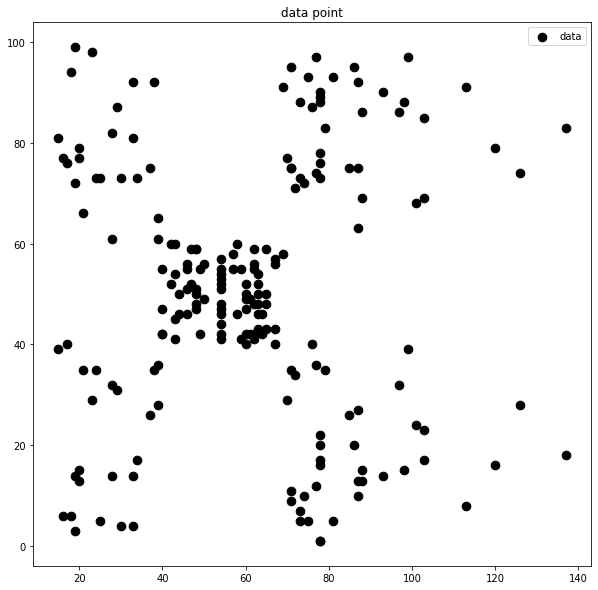

In [112]:
plt.figure(1, figsize=(10,10))
plt.scatter(X,Y, s= 75, c="k", label="data")
plt.title("data point")
plt.legend()
plt.show()

# 2. Implement function
<hr>

In [93]:
def compute_distance(a, b):

    dist = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    return dist

def compute_centroid(Z):

    center = np.mean(Z, axis = 0) #centroid of a set of points in P#
    
    return center

def compute_label(z, M):

    distance = list(map(lambda x: compute_distance(z, x), M))
    label = np.argmin(distance)   #label of point z with a set of centroids M#
    
    return label

def compute_loss(C, M):
    n = 0
    loss = 0
    for i in range(len(C)):
      idx = (C[:,0]==i)
      C_idx = C[idx]
      for z in C_idx:
        loss += compute_distance(z[1:], M[i])
        n += 1
    loss = 1/n * loss

    return loss


## Test Code
test_z1 = np.array([2,5])
test_z2 = np.array([5,1])
print(f"Compute_distance test: {compute_distance(test_z1, test_z2)}")

test_Z = np.array([test_z1, test_z2])
print(f"Compute_centroid test: {compute_centroid(test_Z)}")

test_z3 = np.array([1,1])
test_M = np.array([[5,1], [2,4], [2,2]])
print(f"Compute_label test: {compute_label(test_z3, test_M)}")

test_C = np.array([[0,1,2],[1,2,3],[2,3,4],[1,4,5],[0,5,6],[2,6,7]])
print(test_C.shape)
print(f"Compute_loss test: {compute_loss(test_C, test_M)}")

Compute_distance test: 5.0
Compute_centroid test: [3.5 3. ]
Compute_label test: 2
(6, 3)
Compute_loss test: 3.4997276363416816


# 3. Initialize Cluster
<hr>

In [58]:
C_idx = np.random.randint(0,5,200)[:,None]
C = np.hstack((C_idx, data))
print(C.shape)
print(C[:5])

(200, 3)
[[ 4 15 39]
 [ 1 15 81]
 [ 0 16  6]
 [ 4 16 77]
 [ 3 17 40]]


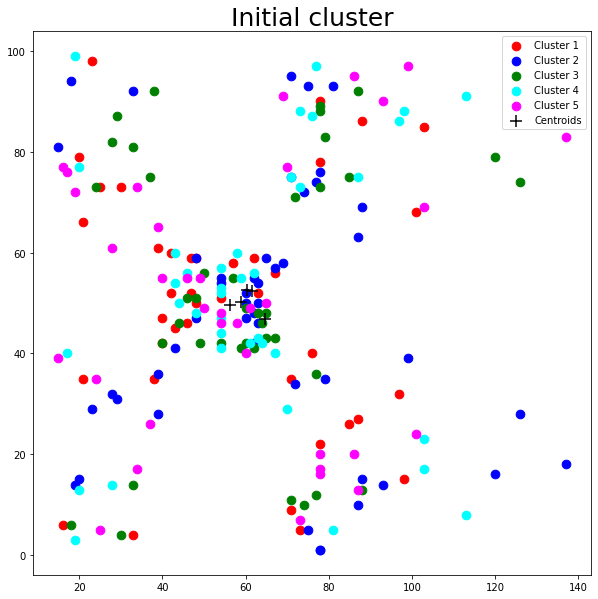

In [111]:
idx_0 = (C[:,0]==0)
idx_1 = (C[:,0]==1)
idx_2 = (C[:,0]==2)
idx_3 = (C[:,0]==3)
idx_4 = (C[:,0]==4)

C_0 = C[idx_0]
C_1 = C[idx_1]
C_2 = C[idx_2]
C_3 = C[idx_3]
C_4 = C[idx_4]

M = []
M.append(compute_centroid(C_0[:,1:]))
M.append(compute_centroid(C_1[:,1:]))
M.append(compute_centroid(C_2[:,1:]))
M.append(compute_centroid(C_3[:,1:]))
M.append(compute_centroid(C_4[:,1:]))
M = np.array(M)

plt.figure(1, figsize=(10,10))
plt.scatter(C[idx_0, 1],C[idx_0, 2], s= 75, c="r", label="Cluster 1")
plt.scatter(C[idx_1, 1],C[idx_1, 2], s= 75, c="b", label="Cluster 2")
plt.scatter(C[idx_2, 1],C[idx_2, 2], s= 75, c="g", label="Cluster 3")
plt.scatter(C[idx_3, 1],C[idx_3, 2], s= 75, c="aqua", label="Cluster 4")
plt.scatter(C[idx_4, 1],C[idx_4, 2], s= 75, c="fuchsia", label="Cluster 5")
plt.scatter(M[:, 0], M[:, 1], marker = "+", s = 150, c='k', label="Centroids")
plt.title("Initial cluster", fontsize=25)
plt.legend()
plt.show()